In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.isnull().any()

TV           False
radio        False
newspaper    False
sales        False
dtype: bool

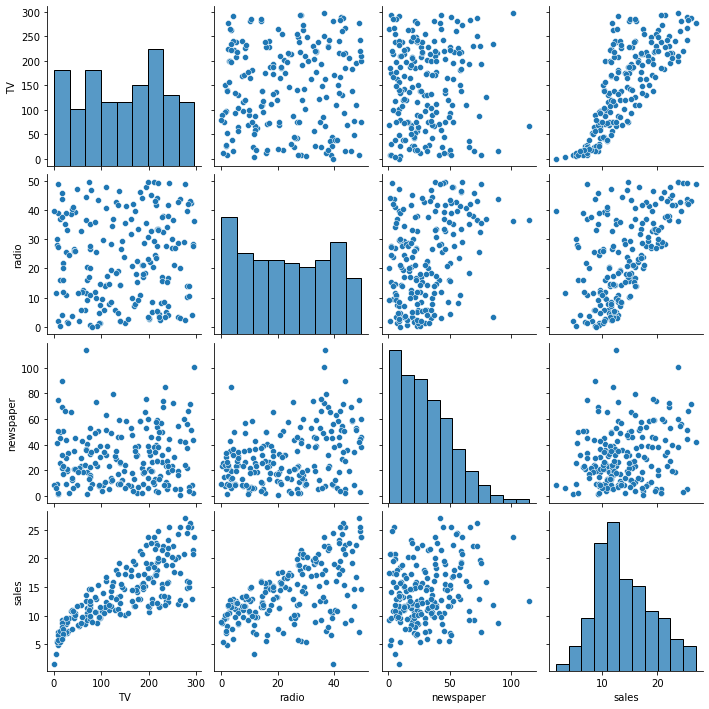

In [8]:
sns.pairplot(df);

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [10]:
X = df[["TV", "radio", "newspaper"]] # X = df.drop("sales", axis=1)
y = df["sales"]

In [11]:
# pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [13]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [14]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()

In [17]:
model.fit(X_train, y_train)

LinearRegression()

In [18]:
y_pred = model.predict(X_test)

In [19]:
y_pred

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [20]:
my_dict = {"Actual":y_test, "pred":y_pred}
compare = pd.DataFrame(my_dict)

In [21]:
compare

,Actual,pred
95,16.9,16.565396
15,22.4,21.188228
30,21.4,21.551071
158,7.3,10.889238
128,24.7,22.202320
115,12.6,13.355569
69,22.3,21.196925
170,8.4,7.350285
174,11.5,13.275471
45,14.9,15.124495


In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
r2_score(y_test, y_pred)

0.8609466508230368

In [24]:
mean_absolute_error(y_test, y_pred)

1.5116692224549084

In [25]:
mean_squared_error(y_test, y_pred)

3.79679723671522

In [26]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.9485372043446387

In [27]:
df.sales.mean()

14.022500000000003

In [28]:
1.51/14

0.10785714285714286

In [29]:
1.91/14

0.13642857142857143

In [30]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score: ", score, "\n", "mae: ", mae, "\n", "mse: ", mse, "\n", "rmse: ", rmse)

In [31]:
eval_metric(y_test, y_pred)

r2_score:  0.8609466508230368 
 mae:  1.5116692224549084 
 mse:  3.79679723671522 
 rmse:  1.9485372043446387


In [32]:
y_train_pred = model.predict(X_train)

In [33]:
eval_metric(y_train, y_train_pred) # r2_score should be higher, errors should be less

r2_score:  0.9055159502227753 
 mae:  1.1581502948072528 
 mse:  2.4793551789057866 
 rmse:  1.574596830590544


### *plotting residual*

In [34]:
y_pred = model.predict(X_test)
residuals = y_test - y_pred

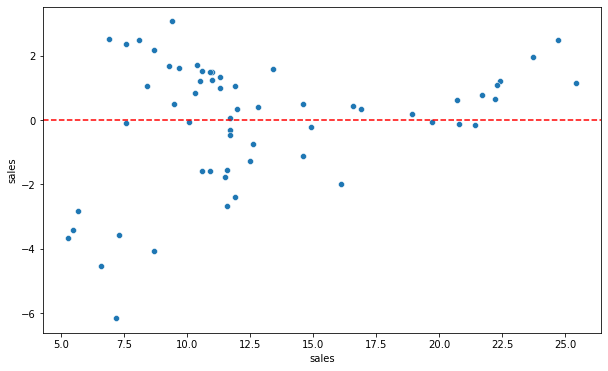

In [35]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = y_test, y = residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--');

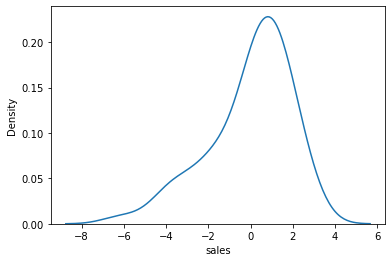

In [36]:
sns.kdeplot(residuals);

In [37]:
# pip install yellowbrick

In [39]:
from yellowbrick.regressor import ResidualsPlot

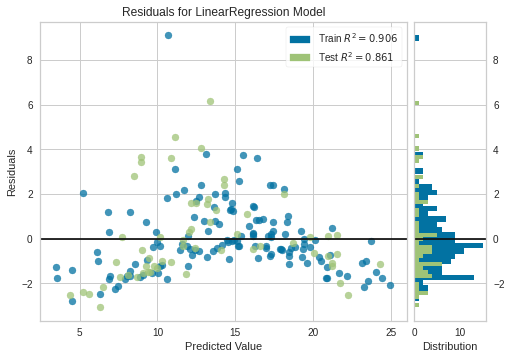

In [40]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();        # Finalize and render the figure

In [41]:
from yellowbrick.regressor import PredictionError

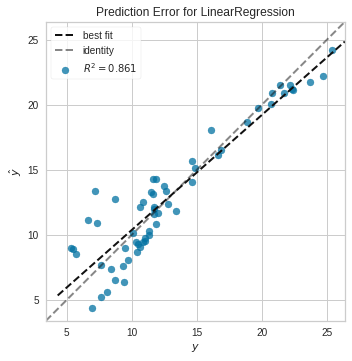

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [42]:
# Instantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [43]:
final_model = LinearRegression()

In [44]:
final_model.fit(X, y)

LinearRegression()

### *Coefficients*

In [45]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [46]:
final_model.intercept_

2.9388893694594103

In [47]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [48]:
coeff_df = pd.DataFrame(final_model.coef_, X.columns, columns=["Coefficient"])

In [49]:
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


In [50]:
adv = [150,20,15]
adv = np.array(adv).reshape(1,-1)

In [51]:
adv

array([[150,  20,  15]])

In [52]:
final_model.predict(adv)

array([13.55862413])

In [53]:
0.045765*150 + 0.188530*20 + -0.001037*15 + 2.9388893694594085

13.558684369459407

In [54]:
adv_2 = [[150,20,15],[160,20,15]]
adv_2 = np.array(adv_2)

In [55]:
final_model.predict(adv_2)

array([13.55862413, 14.01627059])

In [56]:
14.01627059-13.55862413 

0.4576464599999994

In [57]:
0.045765*10

0.45765

In [58]:
np.array(adv).reshape(3,1)

array([[150],
       [ 20],
       [ 15]])

In [59]:
coeff_df*np.array(adv).reshape(3,1)

,Coefficient
TV,6.864697
radio,3.770600
newspaper,-0.015562


In [60]:
6.864697/13.55862413 # Percent of TV in predict value it is %50 

0.5062974630892729

In [61]:
3.770600/13.55862413 # Percent of radio (Buradaki yüzdeliklere göre gerekli görmediğimiz features modele dahil etmiyoruz. Daha kararlı bir model oluşturmak için)

0.2780960637191142

In [62]:
### *

In [63]:
X = df[["TV", "radio"]] # Remove neswpaper because its percent is low in predict data
y = df.sales

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
final_model_2 = LinearRegression()

In [66]:
final_model_2.fit(X_train, y_train)

LinearRegression()

In [67]:
y_pred_new = final_model_2.predict(X_test)

In [68]:
eval_metric(y_test, y_pred_new) # Include TV and radio features

r2_score:  0.8656253548947075 
 mae:  1.4758950903812145 
 mse:  3.6690470545306804 
 rmse:  1.9154756731764255


In [69]:
"""r2_score:  0.8609466508230367 
 mae:  1.511669222454909 
 mse:  3.7967972367152227 
 rmse:  1.9485372043446394""" # Include all features

'r2_score:  0.8609466508230367 \n mae:  1.511669222454909 \n mse:  3.7967972367152227 \n rmse:  1.9485372043446394'